In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Gradient Boosting Regression

In [48]:
np.random.seed(1)
m = 200
x = np.random.rand(m, 1)
y = 4 * (x[:, 0] - 0.5) ** 2 + np.random.randn(m) / 10

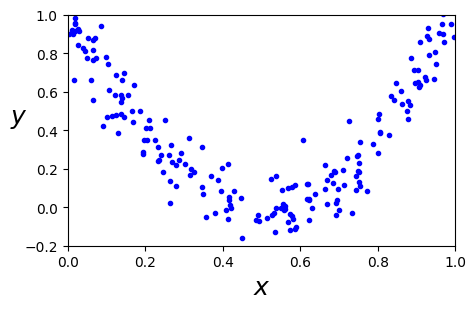

In [49]:
plt.figure(figsize=(5, 3))
plt.plot(x, y, "b.")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 1, -0.2, 1])
plt.show()

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## GradientBoostingRegressor()

In [51]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor(max_depth=2, n_estimators=20, random_state=42)

gb_reg.fit(x_train, y_train)

gb_reg.score(x_train, y_train), gb_reg.score(x_test, y_test)

(0.8765001362681165, 0.867409910568697)

In [52]:
def plot_regression_predictions(model, x, y, axes=[0, 1, -0.2, 1]):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = model.predict(x1.reshape(-1, 1))

    plt.plot(x, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

    plt.axis(axes)
    plt.xlabel("$x$", fontsize=18)
    plt.ylabel("$y$", rotation=0, fontsize=18)
    plt.legend(loc="upper center", fontsize=14)

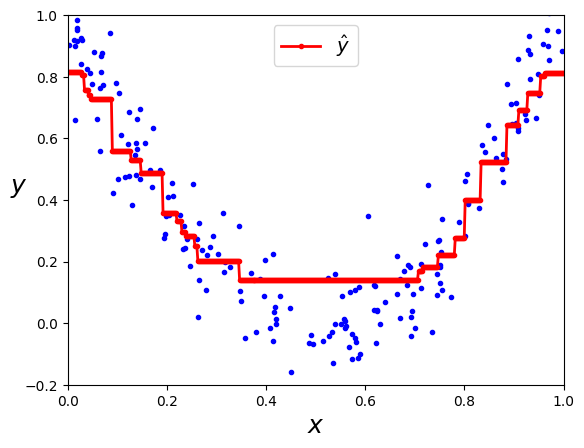

In [53]:
plot_regression_predictions(gb_reg, x, y)

## Early Stopping

In [54]:
from sklearn.metrics import mean_squared_error

gb_reg = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)

gb_reg.fit(x_train, y_train)

mses = [
    mean_squared_error(y_test, y_pred)
    for y_pred in gb_reg.staged_predict(x_test)
]

best_n_estimators = np.argmin(mses) + 1
best_n_estimators

63

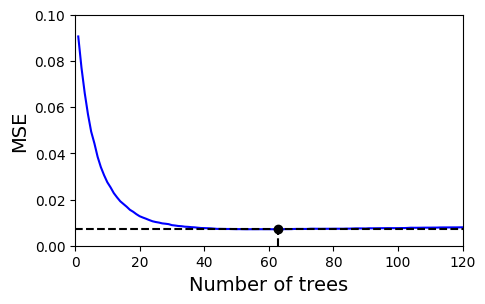

In [55]:
min_mse = np.min(mses)

plt.figure(figsize=(5, 3))
plt.plot(range(1, 121), mses, "b-")
plt.plot(best_n_estimators, min_mse, "ko")
plt.plot([best_n_estimators, best_n_estimators], [0, min_mse], "k--")
plt.plot([0, 120], [min_mse, min_mse], "k--")
plt.axis([0, 120, 0, 0.1])
plt.xlabel("Number of trees", fontsize=14)
plt.ylabel("MSE", fontsize=14)
plt.show()

In [56]:
gb_reg_best = GradientBoostingRegressor(max_depth=2, n_estimators=best_n_estimators, random_state=42)

gb_reg_best.fit(x_train, y_train)

gb_reg_best.score(x_train, y_train), gb_reg_best.score(x_test, y_test)

(0.9408046482827457, 0.926406463338116)

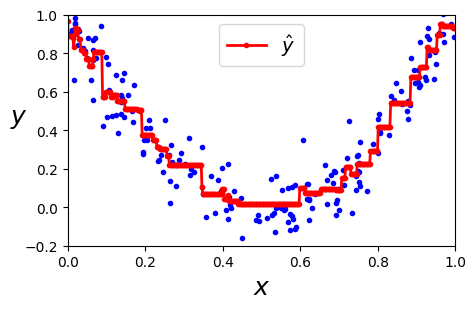

In [57]:
plt.figure(figsize=(5, 3))

plot_regression_predictions(gb_reg_best, x, y)

plt.show()

# Gradient Boosting Classificaiton

In [58]:
from sklearn.datasets import make_moons

x, y = make_moons(n_samples=500, noise=0.3, random_state=42)

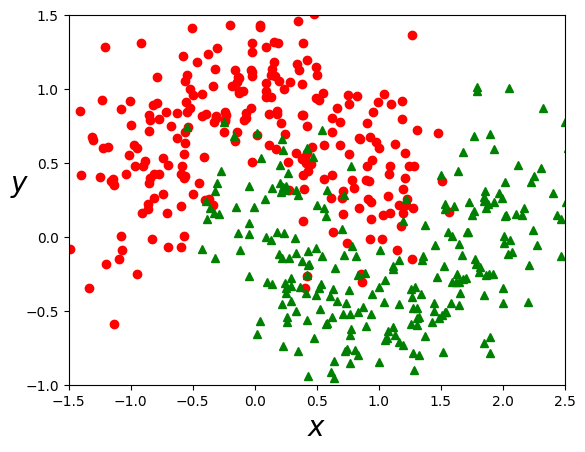

In [59]:
def plot_dataset(x, y, axes):
    plt.plot(x[:, 0][y==0], x[:, 1][y==0], "ro")
    plt.plot(x[:, 0][y==1], x[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.xlabel(r"$x$", fontsize=20)
    plt.ylabel(r"$y$", fontsize=20, rotation=0)

plt.Figure(figsize=(5, 3))
plot_dataset(x, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [60]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## GradientBoostingClassifier

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(n_estimators=1000, random_state=42)

gb_clf.fit(x_train, y_train)

gb_clf.score(x_train, y_train), gb_clf.score(x_test, y_test)

(1.0, 0.87)

In [62]:
def plot_decision_boundary(clf, x, y, axes):
  x1s = np.linspace(axes[0], axes[1], 100)
  x2s = np.linspace(axes[2], axes[3], 100)
  x1, x2 = np.meshgrid(x1s, x2s)
  x_new = np.c_[x1.ravel(), x2.ravel()]
  y_pred = clf.predict(x_new).reshape(x1.shape)

  plt.contourf(x1, x2, y_pred, alpha=0.2)
  plt.contour(x1, x2, y_pred)

  plot_dataset(x, y, axes)

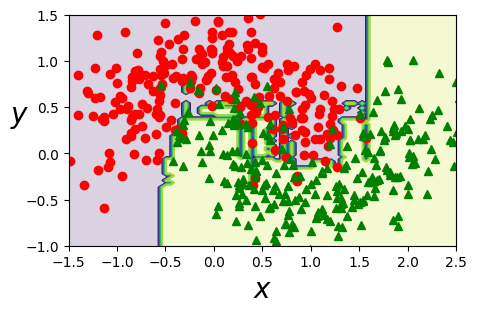

In [63]:
plt.figure(figsize=(5, 3))
plot_decision_boundary(gb_clf, x, y, [-1.5, 2.5, -1, 1.5])
plt.show()

## Early Stopping

In [64]:
from sklearn.metrics import accuracy_score

gb_clf = GradientBoostingClassifier(n_estimators=120, random_state=42)
gb_clf.fit(x_train, y_train)

errors = [
  1 - accuracy_score(y_test, y_pred)
  for y_pred in gb_clf.staged_predict(x_test)
]

best_n_estimators = np.argmin(errors) + 1
best_n_estimators

8

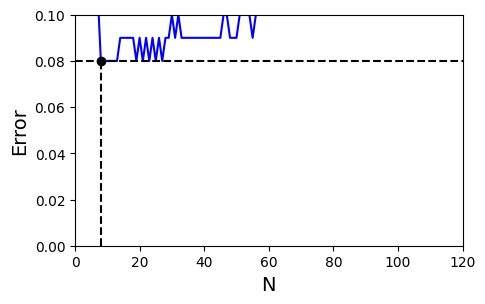

In [65]:
min_error = np.min(errors)

plt.figure(figsize=(5, 3))
plt.plot(range(1, 121), errors, "b-")
plt.plot(best_n_estimators, min_error, "ko")
plt.plot([best_n_estimators, best_n_estimators], [0, min_error], "k--")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.axis([0, 120, 0, 0.1])
plt.xlabel("N", fontsize=14)
plt.ylabel("Error", fontsize=14)
plt.show()

In [66]:
gb_clf_best = GradientBoostingClassifier(n_estimators=best_n_estimators, random_state=42)

gb_clf_best.fit(x_train, y_train)

gb_clf_best.score(x_train, y_train), gb_clf_best.score(x_test, y_test)

(0.9225, 0.92)

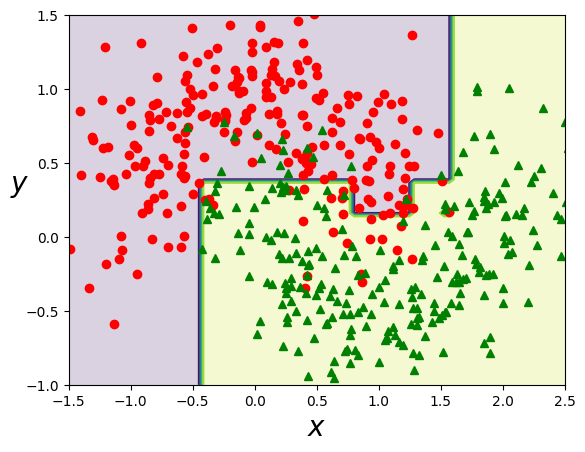

In [67]:
plt.Figure(figsize=(5, 3))

plot_decision_boundary(gb_clf_best, x, y, [-1.5, 2.5, -1, 1.5])

plt.show()